In [1]:
#Fix kernel issue with duplicate files from torchvision
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Machine learning framework
import torch
import torch.nn as nn
import torchvision
from torchvision.io import read_image, ImageReadMode

#Plots
import matplotlib.pyplot as plt

In [2]:
#Read image
image = read_image("imports/ML.jpg", mode=ImageReadMode.GRAY).type(torch.FloatTensor)
image = image.unsqueeze_(0)  # Add a dimension

#Create the two matrices
sobel_x = torch.tensor([[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]  ).expand(1,1,3,3)
sobel_y = torch.tensor([[1., 2., 1.],  [0., 0., 0.],  [-1., -2., -1.]]).expand(1,1,3,3)
sobel = torch.cat((sobel_x, sobel_y), dim=0)

'''
    Input: an image and a filter
    Output: the image when filter is applied
'''
def sobelFilter(img, filter):
    conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1, bias=False) # 2D convolution layer
    conv.weight = torch.nn.Parameter(filter, requires_grad=False) #Apply filter
    c = conv(img)

    # c now conatians two images (G_x, G_y) as seen by its shape: [1, -->2, 480, 640], we want to split into two feature maps.
    G_x = torch.squeeze(c[:,0,:,:].expand(1,1,480,640))
    G_y = torch.squeeze(c[:,1,:,:].expand(1,1,480,640))

    #Compute G by the formular given in the assignment
    G = torch.square(torch.square(G_x) + torch.square(G_y))
    #Remove unnecessary dimmensions, from [1,1,480,640] --> [480,640]
    return G, G_x, G_y
newImage, gx, gy = sobelFilter(image, sobel)

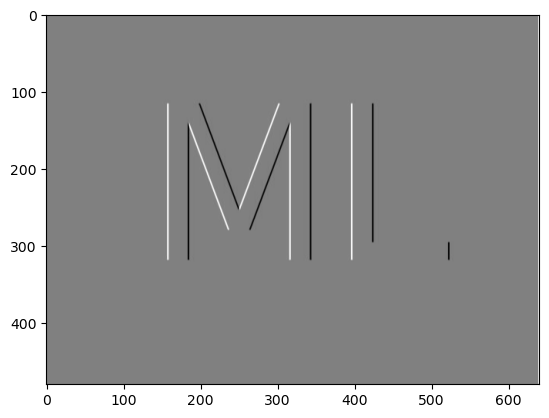

In [3]:
plt.imshow(gx, cmap='gray');

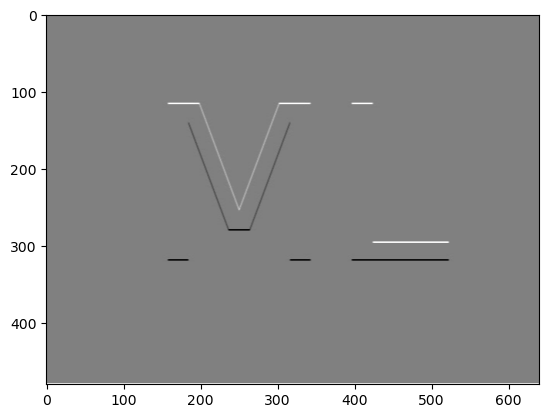

In [4]:
plt.imshow(gy, cmap='gray');

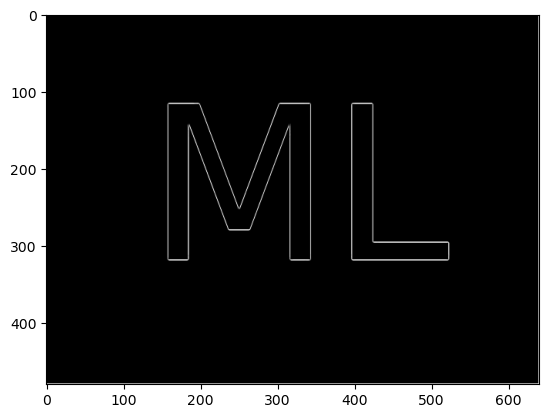

In [5]:
plt.imshow(newImage, cmap='gray');